In [117]:
import pandas as pd
import sqlite3 
import numpy as np
from scipy import stats
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits import mplot3d
import seaborn as sns
import sklearn.metrics as metrics
import statsmodels.api as sm
from lin_reg import best_line
%matplotlib inline

In [118]:
# Reading in data files

movie_budgets = pd.read_csv('../data/tn.movie_budgets.csv.gz')
tmdb_movies = pd.read_csv('../data/tmdb.movies.csv.gz')
rt_reviews = pd.read_csv('../data/rt.reviews.tsv.gz', sep = '\t', encoding='latin-1')
rt_movie_info = pd.read_csv('../data/rt.movie_info.tsv.gz', sep = '\t')
movie_gross = pd.read_csv('../data/bom.movie_gross.csv.gz')

con = sqlite3.connect('../data/im.db')
schema_imdb = pd.read_sql(
"""
SELECT *
FROM sqlite_master;
""", con)
schema_imdb

,type,name,tbl_name,rootpage,sql
0,table,movie_basics,movie_basics,2,"CREATE TABLE ""movie_basics"" (\n""movie_id"" TEXT..."
1,table,directors,directors,3,"CREATE TABLE ""directors"" (\n""movie_id"" TEXT,\n..."
2,table,known_for,known_for,4,"CREATE TABLE ""known_for"" (\n""person_id"" TEXT,\..."
3,table,movie_akas,movie_akas,5,"CREATE TABLE ""movie_akas"" (\n""movie_id"" TEXT,\..."
4,table,movie_ratings,movie_ratings,6,"CREATE TABLE ""movie_ratings"" (\n""movie_id"" TEX..."
5,table,persons,persons,7,"CREATE TABLE ""persons"" (\n""person_id"" TEXT,\n ..."
6,table,principals,principals,8,"CREATE TABLE ""principals"" (\n""movie_id"" TEXT,\..."
7,table,writers,writers,9,"CREATE TABLE ""writers"" (\n""movie_id"" TEXT,\n ..."


# Final Draft Edits of Final.ipynb

In [ ]:
# Grouped bar chart for directors
categories = ['Domestic ROI', 'Worldwide ROI']
merged_d_e_means = [merged_d_e['domestic_ROI'].mean(), merged_d_e['domestic_gross'].mean() ]
merged_d_n_e_means = [merged_d_n_e['domestic_ROI'].mean(), merged_d_n_e['domestic_gross'].mean()]

bar_width = 0.25
# Set the positions of bars on X-axis
r1 = range(len(categories))
r2 = [x + bar_width for x in r1]

# Create the grouped bar plot
plt.bar(r1, threed_means, color='blue', width=bar_width, label='3-D Movies')
plt.bar(r2, no_threed_means, color='red', width=bar_width, label='Not 3-D Movies')

# Add labels, title, and legend
plt.xlabel('Metrics')
plt.ylabel('Mean ROI (%)')
plt.title('ROI Comparison for 3-D and Not 3-D Movies')
plt.xticks([r + bar_width/2 for r in r1], categories)
plt.legend()

# Show the plot
plt.show()

## Markdown drafts


## Looking at imdb

In [119]:
directors_experienced = pd.read_sql(
"""
SELECT DISTINCT person_id
FROM directors
GROUP BY person_id
HAVING COUNT() >5;
""", con)
directors_experienced

,person_id
0,nm0000095
1,nm0000108
2,nm0000110
3,nm0000116
4,nm0000123
...,...
9737,nm9983975
9738,nm9985563
9739,nm9986248
9740,nm9987882


In [120]:
directors_not_experienced = pd.read_sql(
"""
SELECT DISTINCT person_id
FROM directors
GROUP BY person_id
HAVING COUNT() <=5;
""", con)
directors_not_experienced

,person_id
0,nm0000080
1,nm0000118
2,nm0000127
3,nm0000128
4,nm0000136
...,...
99506,nm9993281
99507,nm9993379
99508,nm9993380
99509,nm9993381


In [121]:
writers = pd.read_sql(
"""
SELECT DISTINCT person_id
FROM writers
GROUP BY person_id
HAVING COUNT() >5;
""", con)
writers

,person_id
0,nm0000095
1,nm0000108
2,nm0000116
3,nm0000118
4,nm0000175
...,...
5906,nm9977220
5907,nm9983975
5908,nm9985563
5909,nm9987882


In [122]:
known_for = pd.read_sql(
"""
SELECT *
FROM known_for
""", con)
known_for

,person_id,movie_id
0,nm0061671,tt0837562
1,nm0061671,tt2398241
2,nm0061671,tt0844471
3,nm0061671,tt0118553
4,nm0061865,tt0896534
...,...,...
1638255,nm9990690,tt9090932
1638256,nm9990690,tt8737130
1638257,nm9991320,tt8734436
1638258,nm9991320,tt9615610


In [123]:
movie_ratings = pd.read_sql(
"""
SELECT *
FROM movie_ratings
""", con)
movie_ratings

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21
...,...,...,...
73851,tt9805820,8.1,25
73852,tt9844256,7.5,24
73853,tt9851050,4.7,14
73854,tt9886934,7.0,5


In [124]:
movie_akas = pd.read_sql(
"""
SELECT *
FROM movie_akas
""", con)
movie_akas

,movie_id,ordering,title,region,language,types,attributes,is_original_title
0,tt0369610,10,Джурасик свят,BG,bg,None,None,0.0
1,tt0369610,11,Jurashikku warudo,JP,None,imdbDisplay,None,0.0
2,tt0369610,12,Jurassic World: O Mundo dos Dinossauros,BR,None,imdbDisplay,None,0.0
3,tt0369610,13,O Mundo dos Dinossauros,BR,None,None,short title,0.0
4,tt0369610,14,Jurassic World,FR,None,imdbDisplay,None,0.0
...,...,...,...,...,...,...,...,...
331698,tt9827784,2,Sayonara kuchibiru,None,None,original,None,1.0
331699,tt9827784,3,Farewell Song,XWW,en,imdbDisplay,None,0.0
331700,tt9880178,1,La atención,None,None,original,None,1.0
331701,tt9880178,2,La atención,ES,None,None,None,0.0


In [125]:
movie_basics = pd.read_sql(
"""
SELECT *
FROM movie_basics
""", con)
movie_basics

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,None


In [126]:
principals = pd.read_sql(
"""
SELECT *
FROM principals
WHERE category = 'actor' OR category = 'actress' OR characters != 'None'
GROUP BY person_id
HAVING COUNT() >5
""", con)
principals

,movie_id,ordering,person_id,category,job,characters
0,tt1637702,3,nm0000026,archive_footage,None,"[""Himself""]"
1,tt1979172,2,nm0000092,actor,None,"[""John Cleese"",""Exploding Don"",""David Frost""]"
2,tt1001526,3,nm0000093,actor,None,"[""Metro Man""]"
3,tt1849742,3,nm0000095,self,None,"[""Himself""]"
4,tt1770734,3,nm0000096,actress,None,"[""Kate Fletcher""]"
...,...,...,...,...,...,...
8938,tt2284964,1,nm9575332,actor,None,None
8939,tt4898004,1,nm9706424,actor,None,None
8940,tt8310586,3,nm9779533,actor,None,None
8941,tt10457158,4,nm9799185,actor,None,"[""Kondo""]"


In [127]:
persons = pd.read_sql(
"""
SELECT *
FROM persons
""", con)
persons

,person_id,primary_name,birth_year,death_year,primary_profession
0,nm0061671,Mary Ellen Bauder,NaN,NaN,"miscellaneous,production_manager,producer"
1,nm0061865,Joseph Bauer,NaN,NaN,"composer,music_department,sound_department"
2,nm0062070,Bruce Baum,NaN,NaN,"miscellaneous,actor,writer"
3,nm0062195,Axel Baumann,NaN,NaN,"camera_department,cinematographer,art_department"
4,nm0062798,Pete Baxter,NaN,NaN,"production_designer,art_department,set_decorator"
...,...,...,...,...,...
606643,nm9990381,Susan Grobes,NaN,NaN,actress
606644,nm9990690,Joo Yeon So,NaN,NaN,actress
606645,nm9991320,Madeline Smith,NaN,NaN,actress
606646,nm9991786,Michelle Modigliani,NaN,NaN,producer


## Getting datasets for experienced vs. not experienced Directors and Writers

In [128]:
#final for data cleaning

d_n_e = pd.read_sql(
"""
SELECT m.averagerating, m.numvotes, d_e.person_id, b.primary_title
FROM movie_ratings AS m
    JOIN 
        (SELECT DISTINCT person_id, movie_id
        FROM directors
        GROUP BY person_id
        HAVING COUNT() <=3) AS d_e
    USING(movie_id)
    JOIN movie_basics AS b
    USING(movie_id)
""", con)
d_n_e.describe(include='all')

,averagerating,numvotes,person_id,primary_title
count,39566.000000,39566.000000,39566,39566
unique,NaN,NaN,39566,34106
top,NaN,NaN,nm2067985,"Milano 55,1. Cronaca di una settimana di passioni"
freq,NaN,NaN,1,48
mean,6.515766,909.214224,NaN,NaN
std,1.491461,9040.204720,NaN,NaN
min,1.000000,5.000000,NaN,NaN
25%,5.600000,11.000000,NaN,NaN
50%,6.700000,29.000000,NaN,NaN
75%,7.600000,134.000000,NaN,NaN


In [129]:
d_e = pd.read_sql(
"""
SELECT m.averagerating, m.numvotes, d_n_e.person_id, b.primary_title
FROM movie_ratings AS m
    JOIN 
        (SELECT DISTINCT person_id, movie_id
        FROM directors
        GROUP BY person_id
        HAVING COUNT() >3) AS d_n_e
    USING(movie_id)
    JOIN movie_basics AS b
    USING(movie_id)
""", con)
d_e.describe(include='all')

,averagerating,numvotes,person_id,primary_title
count,12765.000000,1.276500e+04,12765,12765
unique,NaN,NaN,12765,10020
top,NaN,NaN,nm2197069,World of Death
freq,NaN,NaN,1,83
mean,6.159976,5.892464e+03,NaN,NaN
std,1.389006,3.771988e+04,NaN,NaN
min,1.000000,5.000000e+00,NaN,NaN
25%,5.400000,2.100000e+01,NaN,NaN
50%,6.300000,8.500000e+01,NaN,NaN
75%,7.100000,5.080000e+02,NaN,NaN


In [130]:
w_n_e = pd.read_sql(
"""
SELECT m.averagerating, m.numvotes, w_n_e.person_id, b.primary_title
FROM movie_ratings as m
    JOIN 
        (SELECT DISTINCT person_id, movie_id
        FROM writers
        GROUP BY person_id
        HAVING COUNT() <=3) as w_n_e
    USING(movie_id)
    JOIN movie_basics AS b
    USING(movie_id)
""", con)
w_n_e.describe(include='all')

,averagerating,numvotes,person_id,primary_title
count,63619.000000,6.361900e+04,63619,63619
unique,NaN,NaN,63619,40989
top,NaN,NaN,nm2399324,Hug an Atheist
freq,NaN,NaN,1,28
mean,6.274442,3.764226e+03,NaN,NaN
std,1.448698,2.859679e+04,NaN,NaN
min,1.000000,5.000000e+00,NaN,NaN
25%,5.400000,1.500000e+01,NaN,NaN
50%,6.400000,5.700000e+01,NaN,NaN
75%,7.300000,3.340000e+02,NaN,NaN


In [131]:
w_e = pd.read_sql(
"""
SELECT m.averagerating, m.numvotes, w_e.person_id, b.primary_title
FROM movie_ratings as m
    JOIN 
        (SELECT DISTINCT person_id, movie_id
        FROM writers
        GROUP BY person_id
        HAVING COUNT() >3) as w_e
    USING(movie_id)
    JOIN movie_basics AS b
    USING(movie_id)
""", con)
w_e.describe(include='all')

,averagerating,numvotes,person_id,primary_title
count,8434.000000,8.434000e+03,8434,8434
unique,NaN,NaN,8434,5387
top,NaN,NaN,nm2197069,World of Death
freq,NaN,NaN,1,46
mean,6.101672,9.022202e+03,NaN,NaN
std,1.395730,5.134912e+04,NaN,NaN
min,1.000000,5.000000e+00,NaN,NaN
25%,5.300000,2.100000e+01,NaN,NaN
50%,6.200000,9.700000e+01,NaN,NaN
75%,7.100000,6.335000e+02,NaN,NaN


In [132]:
# renaming tmdb_movies and tn.movie_budgets title to match primary key from movie_basics merged d_e, w_e, d_n_e, w_n_e data sets
movie_budgets.rename(columns={"movie":"primary_title"}, inplace=True)
tmdb_movies.rename(columns={"title":"primary_title"}, inplace=True)

In [133]:
# experienced directors final data set
# ?Need to drop some columns?
# ? problem: too few experienced directors and writers
merged_d_e = pd.merge(d_e, tmdb_movies, on='primary_title')
merged_d_e = pd.merge(merged_d_e, movie_budgets, on='primary_title')
merged_d_e

,averagerating,numvotes,person_id,primary_title,Unnamed: 0,genre_ids,id_x,original_language,original_title,popularity,release_date_x,vote_average,vote_count,id_y,release_date_y,production_budget,domestic_gross,worldwide_gross
0,7.6,326657,nm0587955,Moneyball,2505,[18],60308,en,Moneyball,15.393,2011-09-22,7.1,2255,15,"Sep 23, 2011","$50,000,000","$75,605,492","$111,300,835"
1,7.0,85839,nm2648685,Another Earth,2633,"[18, 878]",55420,en,Another Earth,10.030,2011-07-22,6.7,853,48,"Jul 22, 2011","$175,000","$1,321,194","$2,102,779"
2,4.7,59914,nm0001774,Zoolander 2,17483,[35],329833,en,Zoolander 2,12.997,2016-02-12,4.7,1374,64,"Feb 12, 2016","$50,000,000","$28,848,693","$55,348,693"
3,7.2,28994,nm0000776,Chasing Mavericks,5517,[18],82684,en,Chasing Mavericks,6.546,2012-10-26,7.0,329,67,"Oct 26, 2012","$20,000,000","$6,002,756","$8,300,821"
4,5.7,9089,nm0015328,Jumping the Broom,2704,[35],57119,en,Jumping the Broom,8.477,2011-05-06,6.0,103,93,"May 6, 2011","$7,000,000","$37,295,394","$38,158,601"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
722,2.5,54,nm3231736,Plastic,11322,"[18, 28, 35, 80]",208869,en,Plastic,7.815,2014-09-26,6.1,116,39,"Sep 26, 2014","$10,000,000",$0,"$575,371"
723,5.6,74979,nm0027271,Resident Evil: The Final Chapter,22654,"[28, 27, 878]",173897,en,Resident Evil: The Final Chapter,0.844,2017-01-27,5.9,1859,84,"Jan 27, 2017","$40,000,000","$26,844,692","$314,101,190"
724,7.0,163279,nm0197855,Game Night,23908,"[9648, 35, 80]",445571,en,Game Night,19.459,2018-02-23,6.9,2756,94,"Feb 23, 2018","$37,000,000","$69,179,066","$117,378,084"
725,7.0,163279,nm0326246,Game Night,23908,"[9648, 35, 80]",445571,en,Game Night,19.459,2018-02-23,6.9,2756,94,"Feb 23, 2018","$37,000,000","$69,179,066","$117,378,084"


In [134]:
# non-experienced directors final data set

merged_d_n_e = pd.merge(d_n_e, tmdb_movies, on='primary_title')
merged_d_n_e = pd.merge(merged_d_n_e, movie_budgets, on='primary_title')
merged_d_n_e

,averagerating,numvotes,person_id,primary_title,Unnamed: 0,genre_ids,id_x,original_language,original_title,popularity,release_date_x,vote_average,vote_count,id_y,release_date_y,production_budget,domestic_gross,worldwide_gross
0,7.0,1613,nm1464150,The Hammer,869,"[18, 35]",74447,en,Hamill,1.961,2010-10-26,6.5,16,50,"Mar 21, 2008","$850,000","$442,638","$442,638"
1,6.5,13,nm4418339,The Hammer,869,"[18, 35]",74447,en,Hamill,1.961,2010-10-26,6.5,16,50,"Mar 21, 2008","$850,000","$442,638","$442,638"
2,4.4,69199,nm0455078,Sex and the City 2,137,"[35, 18, 10749]",37786,en,Sex and the City 2,9.986,2010-05-27,5.9,809,16,"May 27, 2010","$95,000,000","$95,347,692","$294,680,778"
3,5.6,44490,nm2552536,Don't Be Afraid of the Dark,214,"[14, 27, 53]",46261,en,Don't Be Afraid of the Dark,8.405,2010-11-06,5.5,550,43,"Aug 26, 2011","$25,000,000","$24,046,682","$39,126,427"
4,7.1,129443,nm0002339,Remember Me,92,"[18, 10749]",23169,en,Remember Me,11.453,2010-03-12,7.1,2079,51,"Mar 12, 2010","$16,000,000","$19,068,240","$56,506,120"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1122,7.7,1165,nm4717106,Phantom,8199,[53],152259,en,Phantom,7.211,2013-03-01,6.0,151,43,"Mar 1, 2013","$18,000,000","$1,034,589","$1,199,510"
1123,5.0,102,nm2670525,8 Days,12875,"[53, 18]",433715,en,8 Days,0.840,2014-06-15,8.0,2,48,"Oct 13, 2015","$2,500,000",$0,$0
1124,6.9,14122,nm0697656,Beyond the Lights,11333,"[10749, 18]",241771,en,Beyond the Lights,7.717,2014-11-14,7.0,238,16,"Nov 14, 2014","$7,000,000","$14,618,727","$14,618,727"
1125,6.9,14122,nm0697656,Beyond the Lights,14469,"[10749, 18]",241771,en,Beyond the Lights,7.717,2014-11-14,7.0,238,16,"Nov 14, 2014","$7,000,000","$14,618,727","$14,618,727"


In [135]:
# experienced writers final data set

merged_w_e = pd.merge(w_e, tmdb_movies, on='primary_title')
merged_w_e = pd.merge(merged_w_e, movie_budgets, on='primary_title')
merged_w_e

,averagerating,numvotes,person_id,primary_title,Unnamed: 0,genre_ids,id_x,original_language,original_title,popularity,release_date_x,vote_average,vote_count,id_y,release_date_y,production_budget,domestic_gross,worldwide_gross
0,8.0,621193,nm1872664,The Revenant,14203,"[37, 18, 12]",281957,en,The Revenant,19.410,2015-12-25,7.4,11064,27,"Dec 25, 2015","$135,000,000","$183,637,894","$532,938,302"
1,8.0,621193,nm1872664,The Revenant,17411,"[37, 18, 12]",281957,en,The Revenant,19.410,2015-12-25,7.4,11064,27,"Dec 25, 2015","$135,000,000","$183,637,894","$532,938,302"
2,7.2,176699,nm0000092,The Croods,7914,"[28, 12, 16, 35, 10751, 14]",49519,en,The Croods,16.290,2013-03-22,6.8,3873,26,"Mar 22, 2013","$135,000,000","$187,168,425","$573,068,425"
3,6.4,6466,nm0119989,Freakonomics,401,[99],43942,en,Freakonomics,5.705,2010-10-01,6.6,57,80,"Oct 1, 2010","$2,900,000","$101,270","$172,867"
4,6.4,6466,nm1164861,Freakonomics,401,[99],43942,en,Freakonomics,5.705,2010-10-01,6.6,57,80,"Oct 1, 2010","$2,900,000","$101,270","$172,867"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
586,3.1,129,nm1923871,Forsaken,18987,[27],380734,en,Forsaken,1.262,2016-02-02,3.7,15,54,"Feb 19, 2016","$18,000,000",$0,$0
587,3.1,129,nm1923871,Forsaken,22448,[53],461708,es,Forsaken,1.062,2017-06-13,6.6,4,54,"Feb 19, 2016","$18,000,000",$0,$0
588,4.9,632,nm1227232,The Sleepwalker,11910,[18],244776,en,The Sleepwalker,2.659,2014-01-20,4.1,9,2,"Nov 21, 2014","$1,100,000","$2,636","$2,636"
589,6.2,760,nm0502412,Out of the Blue,10024,[28],281697,en,Out of the Blue,0.600,2013-10-01,10.0,1,23,"Oct 19, 2007","$4,600,000",$728,"$731,767"


In [136]:
# non-experienced writers
merged_w_n_e = pd.merge(w_n_e, tmdb_movies, on='primary_title')
merged_w_n_e = pd.merge(merged_w_n_e, movie_budgets, on='primary_title')
merged_w_n_e

,averagerating,numvotes,person_id,primary_title,Unnamed: 0,genre_ids,id_x,original_language,original_title,popularity,release_date_x,vote_average,vote_count,id_y,release_date_y,production_budget,domestic_gross,worldwide_gross
0,4.2,50352,nm0001317,The Legend of Hercules,11096,"[28, 12]",188207,en,The Legend of Hercules,13.754,2014-01-10,4.5,805,42,"Jan 10, 2014","$70,000,000","$18,848,538","$58,953,319"
1,4.2,50352,nm0316417,The Legend of Hercules,11096,"[28, 12]",188207,en,The Legend of Hercules,13.754,2014-01-10,4.5,805,42,"Jan 10, 2014","$70,000,000","$18,848,538","$58,953,319"
2,4.2,50352,nm1048866,The Legend of Hercules,11096,"[28, 12]",188207,en,The Legend of Hercules,13.754,2014-01-10,4.5,805,42,"Jan 10, 2014","$70,000,000","$18,848,538","$58,953,319"
3,7.0,1613,nm1559624,The Hammer,869,"[18, 35]",74447,en,Hamill,1.961,2010-10-26,6.5,16,50,"Mar 21, 2008","$850,000","$442,638","$442,638"
4,7.0,1613,nm1670295,The Hammer,869,"[18, 35]",74447,en,Hamill,1.961,2010-10-26,6.5,16,50,"Mar 21, 2008","$850,000","$442,638","$442,638"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3341,6.9,14122,nm0697656,Beyond the Lights,14469,"[10749, 18]",241771,en,Beyond the Lights,7.717,2014-11-14,7.0,238,16,"Nov 14, 2014","$7,000,000","$14,618,727","$14,618,727"
3342,8.2,15,nm1847672,Point Blank,2912,"[28, 53, 80]",61404,fr,À bout portant,6.021,2011-07-29,6.6,230,69,"Sep 18, 1967","$3,000,000",$0,$0
3343,7.4,2724,nm3773554,Teefa in Trouble,24815,"[18, 35, 28, 80]",506971,ur,Teefa in Trouble,4.486,2018-07-20,7.6,11,8,"Jul 20, 2018","$1,500,000",$0,"$98,806"
3344,7.4,2724,nm6511211,Teefa in Trouble,24815,"[18, 35, 28, 80]",506971,ur,Teefa in Trouble,4.486,2018-07-20,7.6,11,8,"Jul 20, 2018","$1,500,000",$0,"$98,806"


## Hypo tests for experienced vs. non-experienced d's and w's

In [137]:
merged_d_e.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 727 entries, 0 to 726
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   averagerating      727 non-null    float64
 1   numvotes           727 non-null    int64  
 2   person_id          727 non-null    object 
 3   primary_title      727 non-null    object 
 4   Unnamed: 0         727 non-null    int64  
 5   genre_ids          727 non-null    object 
 6   id_x               727 non-null    int64  
 7   original_language  727 non-null    object 
 8   original_title     727 non-null    object 
 9   popularity         727 non-null    float64
 10  release_date_x     727 non-null    object 
 11  vote_average       727 non-null    float64
 12  vote_count         727 non-null    int64  
 13  id_y               727 non-null    int64  
 14  release_date_y     727 non-null    object 
 15  production_budget  727 non-null    object 
 16  domestic_gross     727 non

In [144]:
# ?why isn't this function working

def str_replace(df, column):
    df[column] = df[column].str.replace('$','')
    df[column] = df[column].str.replace(',','').astype(int)
    return df[column]
    

str_replace(merged_d_e, 'domestic_gross')
str_replace(merged_d_e, 'worldwide_gross')
str_replace(merged_d_n_e, 'domestic_gross')
str_replace(merged_d_n_e, 'worldwide_gross')
str_replace(merged_w_e, 'domestic_gross')
str_replace(merged_w_e, 'worldwide_gross')
str_replace(merged_w_n_e, 'domestic_gross')
str_replace(merged_w_n_e, 'worldwide_gross')

merged_d_e.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 727 entries, 0 to 726
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   averagerating      727 non-null    float64
 1   numvotes           727 non-null    int64  
 2   person_id          727 non-null    object 
 3   primary_title      727 non-null    object 
 4   Unnamed: 0         727 non-null    int64  
 5   genre_ids          727 non-null    object 
 6   id_x               727 non-null    int64  
 7   original_language  727 non-null    object 
 8   original_title     727 non-null    object 
 9   popularity         727 non-null    float64
 10  release_date_x     727 non-null    object 
 11  vote_average       727 non-null    float64
 12  vote_count         727 non-null    int64  
 13  id_y               727 non-null    int64  
 14  release_date_y     727 non-null    object 
 15  production_budget  727 non-null    object 
 16  domestic_gross     727 non

In [145]:
# # this cell should be replaced by the cell above defining a function
# merged_d_e['domestic_gross'] = merged_d_e['domestic_gross'].str.replace('$','')
# merged_d_e['domestic_gross'] = merged_d_e['domestic_gross'].str.replace(',','')
# merged_d_e['worldwide_gross'] = merged_d_e['worldwide_gross'].str.replace('$','')
# merged_d_e['worldwide_gross'] = merged_d_e['worldwide_gross'].str.replace(',','')

# merged_d_n_e['domestic_gross'] = merged_d_n_e['domestic_gross'].str.replace('$','')
# merged_d_n_e['domestic_gross'] = merged_d_n_e['domestic_gross'].str.replace(',','')
# merged_d_n_e['worldwide_gross'] = merged_d_n_e['worldwide_gross'].str.replace('$','')
# merged_d_n_e['worldwide_gross'] = merged_d_n_e['worldwide_gross'].str.replace(',','')

# merged_w_e['domestic_gross'] = merged_w_e['domestic_gross'].str.replace('$','')
# merged_w_e['domestic_gross'] = merged_w_e['domestic_gross'].str.replace(',','')
# merged_w_e['worldwide_gross'] = merged_w_e['worldwide_gross'].str.replace('$','')
# merged_w_e['worldwide_gross'] = merged_w_e['worldwide_gross'].str.replace(',','')

# merged_w_n_e['domestic_gross'] = merged_w_n_e['domestic_gross'].str.replace('$','')
# merged_w_n_e['domestic_gross'] = merged_w_n_e['domestic_gross'].str.replace(',','')
# merged_w_n_e['worldwide_gross'] = merged_w_n_e['worldwide_gross'].str.replace('$','')
# merged_w_n_e['worldwide_gross'] = merged_w_n_e['worldwide_gross'].str.replace(',','')


In [ ]:
# graph for directors

In [146]:
# defining the variables for the ttests of directors

dx = merged_d_e['averagerating']
dx1 = merged_d_e['popularity']
dx2 = merged_d_e['vote_average']
dx3 = merged_d_e['domestic_gross'].values.astype(int)
dx4 = merged_d_e['worldwide_gross'].values.astype(int)

dy = merged_d_n_e['averagerating']
dy1 = merged_d_n_e['popularity']
dy2 = merged_d_n_e['vote_average']
dy3 = merged_d_n_e['domestic_gross'].values.astype(int)
dy4 = merged_d_n_e['worldwide_gross'].values.astype(int)


In [147]:
# defining a ttest function

def ind_ttest(x, y):
    result = stats.ttest_ind(x, y, equal_var=False)
    return result

In [148]:
# director experience level vs. averagerating
ind_ttest(dx, dy)

Ttest_indResult(statistic=0.8804715464452304, pvalue=0.3787336830372816)

In [149]:
# director experience level vs. popularity
ind_ttest(dx1, dy1)

Ttest_indResult(statistic=11.479417691185002, pvalue=4.3056543645530606e-29)

In [150]:
# director experience level vs. vote_average
ind_ttest(dx2, dy2)

Ttest_indResult(statistic=2.802821459286692, pvalue=0.005122548633549698)

In [151]:
# director experience level vs. domestic_gross
ind_ttest(dx3, dy3)

Ttest_indResult(statistic=8.0092506212308, pvalue=2.873599761318509e-15)

In [152]:
# director experience level vs. worldwide_gross
ind_ttest(dx4, dy4)

Ttest_indResult(statistic=8.498628682340197, pvalue=6.734836155892778e-17)

In [153]:
# defining the variables for the ttest of writers

wx = merged_w_e['averagerating']
wx1 = merged_w_e['popularity']
wx2 = merged_w_e['vote_average']
wx3 = merged_w_e['domestic_gross'].values.astype(int)
wx4 = merged_w_e['worldwide_gross'].values.astype(int)

wy = merged_w_n_e['averagerating']
wy1 = merged_w_n_e['popularity']
wy2 = merged_w_n_e['vote_average']
wy3 = merged_w_n_e['domestic_gross'].values.astype(int)
wy4 = merged_w_n_e['worldwide_gross'].values.astype(int)


In [154]:
# writer experience level vs. averagerating
ind_ttest(wx, wy)

Ttest_indResult(statistic=1.7072991880979278, pvalue=0.08814444237506007)

In [155]:
# writer experience level vs. popularity
ind_ttest(wx1, wy1)

Ttest_indResult(statistic=7.863384654915197, pvalue=1.4029954390144797e-14)

In [156]:
# writer experience level vs. vote_average
ind_ttest(wx2, wy2)

Ttest_indResult(statistic=3.1028408509044207, pvalue=0.0019759095258828564)

In [157]:
# writer experience level vs. domestic_gross
ind_ttest(wx3, wy3)

Ttest_indResult(statistic=8.237079843284182, pvalue=8.889256450324997e-16)

In [158]:
# writer experience level vs. worldwide_gross
ind_ttest(wx4, wy4)

Ttest_indResult(statistic=8.925234306911506, pvalue=4.216466220305276e-18)

## Getting datasets for runtime and budget

In [159]:
movie_budgets.rename(columns={"movie":"primary_title"}, inplace=True)

In [160]:
movie_budgets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   primary_title      5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [161]:
movie_basics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   movie_id         146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


In [162]:
movie_basics_budget = pd.merge(movie_budgets, movie_basics, how ='inner', on='primary_title')
movie_basics_budget = pd.merge(movie_basics_budget, tmdb_movies, how ='inner', on='primary_title')
movie_basics_budget 

,id_x,release_date_x,primary_title,production_budget,domestic_gross,worldwide_gross,movie_id,original_title_x,start_year,runtime_minutes,genres,Unnamed: 0,genre_ids,id_y,original_language,original_title_y,popularity,release_date_y,vote_average,vote_count
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279",tt1775309,Abatâ,2011,93.0,Horror,6,"[28, 12, 14, 878]",19995,en,Avatar,26.526,2009-12-18,7.4,18676
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875",tt1298650,Pirates of the Caribbean: On Stranger Tides,2011,136.0,"Action,Adventure,Fantasy",2470,"[12, 28, 14]",1865,en,Pirates of the Caribbean: On Stranger Tides,30.579,2011-05-20,6.4,8571
2,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963",tt2395427,Avengers: Age of Ultron,2015,141.0,"Action,Adventure,Sci-Fi",14169,"[28, 12, 878]",99861,en,Avengers: Age of Ultron,44.383,2015-05-01,7.3,13457
3,7,"Apr 27, 2018",Avengers: Infinity War,"$300,000,000","$678,815,482","$2,048,134,200",tt4154756,Avengers: Infinity War,2018,149.0,"Action,Adventure,Sci-Fi",23811,"[12, 28, 14]",299536,en,Avengers: Infinity War,80.773,2018-04-27,8.3,13948
4,9,"Nov 17, 2017",Justice League,"$300,000,000","$229,024,295","$655,945,209",tt0974015,Justice League,2017,120.0,"Action,Adventure,Fantasy",20623,"[28, 12, 14, 878]",141052,en,Justice League,34.953,2017-11-17,6.2,7510
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4545,51,"Apr 21, 2015",Ten,"$25,000",$0,$0,tt2496400,Ten,2014,83.0,"Adventure,Horror,Mystery",12326,"[12, 27, 9648, 53]",279516,en,Ten,1.575,2014-03-28,5.4,5
4546,51,"Apr 21, 2015",Ten,"$25,000",$0,$0,tt6415838,Ten,2017,82.0,"Horror,Mystery,Thriller",12326,"[12, 27, 9648, 53]",279516,en,Ten,1.575,2014-03-28,5.4,5
4547,54,"Dec 31, 2014",Dry Spell,"$22,000",$0,$0,tt2375036,Dry Spell,2013,90.0,"Comedy,Romance",10470,"[35, 10749]",255266,en,Dry Spell,0.600,2013-02-14,6.0,1
4548,56,"Jan 4, 2013",All Superheroes Must Die,"$20,000",$0,$0,tt1836212,All Superheroes Must Die,2011,78.0,"Sci-Fi,Thriller",8893,"[878, 53]",86304,en,All Superheroes Must Die,2.078,2013-01-04,3.9,19


In [163]:
movie_basics_budget.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4550 entries, 0 to 4549
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id_x               4550 non-null   int64  
 1   release_date_x     4550 non-null   object 
 2   primary_title      4550 non-null   object 
 3   production_budget  4550 non-null   object 
 4   domestic_gross     4550 non-null   object 
 5   worldwide_gross    4550 non-null   object 
 6   movie_id           4550 non-null   object 
 7   original_title_x   4549 non-null   object 
 8   start_year         4550 non-null   int64  
 9   runtime_minutes    4088 non-null   float64
 10  genres             4474 non-null   object 
 11  Unnamed: 0         4550 non-null   int64  
 12  genre_ids          4550 non-null   object 
 13  id_y               4550 non-null   int64  
 14  original_language  4550 non-null   object 
 15  original_title_y   4550 non-null   object 
 16  popularity         4550 

In [164]:
movie_basics_budget['runtime_minutes'].head()

0     93.0
1    136.0
2    141.0
3    149.0
4    120.0
Name: runtime_minutes, dtype: float64

In [165]:
movie_basics_budget['runtime_minutes'].isna().sum()

462

In [166]:
movie_basics_budget.dropna(subset = ['runtime_minutes'], inplace=True)

str_replace(movie_basics_budget, 'production_budget')
str_replace(movie_basics_budget, 'worldwide_gross')
str_replace(movie_basics_budget, 'domestic_gross')

# movie_basics_budget['production_budget'] = movie_basics_budget['production_budget'].str.replace('$','')
# movie_basics_budget['production_budget'] = movie_basics_budget['production_budget'].str.replace(',','')
# movie_basics_budget['worldwide_gross'] = movie_basics_budget['worldwide_gross'].str.replace('$','')
# movie_basics_budget['worldwide_gross'] = movie_basics_budget['worldwide_gross'].str.replace(',','')
# movie_basics_budget['domestic_gross'] = movie_basics_budget['domestic_gross'].str.replace('$','')
# movie_basics_budget['domestic_gross'] = movie_basics_budget['domestic_gross'].str.replace(',','')


0       760507625
1       241063875
2       459005868
3       678815482
4       229024295
          ...    
4545            0
4546            0
4547            0
4548            0
4549         4584
Name: domestic_gross, Length: 4088, dtype: int64

In [167]:
movie_basics_budget = movie_basics_budget[movie_basics_budget['domestic_gross'] != 0].copy()

## Hypo Tests + Regressions for runtime and budget

In [168]:
# defining the variables for runtime and budget tests

x = movie_basics_budget['runtime_minutes']
x1 = movie_basics_budget['production_budget'].values.astype(int)
y = movie_basics_budget['worldwide_gross'].values.astype(int)
y1 = movie_basics_budget['popularity']
y2 = movie_basics_budget['vote_average']
y3 = movie_basics_budget['domestic_gross'].values.astype(int)


In [169]:
movie_basics_budget['runtime_minutes'].isna().sum()

0

In [170]:
movie_basics_budget['worldwide_gross'].isna().sum()

0

In [171]:
movie_basics_budget['production_budget'].isna().sum()

0

In [172]:
movie_basics_budget['popularity'].isna().sum()

0

In [173]:
movie_basics_budget['vote_average'].isna().sum()

0

In [174]:
movie_basics_budget['domestic_gross'].isna().sum()

0

In [175]:
# runtime vs. gross test
ind_ttest(x, y)

Ttest_indResult(statistic=-34.73399716731795, pvalue=4.694995373847802e-227)

In [184]:
np.polyfit(x, y, deg =1)

array([  535772.20717325, 75053582.97332312])

<AxesSubplot:xlabel='runtime_minutes'>

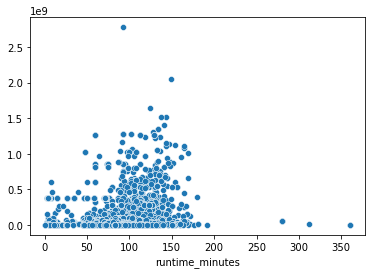

In [176]:
# runtime vs. gross scatter
sns.scatterplot(x=x, y=y)

In [177]:
# runtime vs. popularity test
ind_ttest(x, y1)

Ttest_indResult(statistic=162.05895901992952, pvalue=0.0)

<AxesSubplot:xlabel='runtime_minutes', ylabel='popularity'>

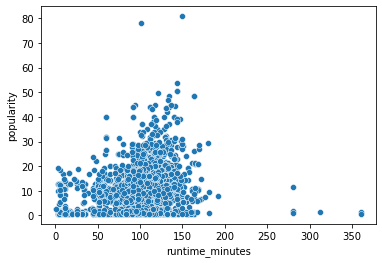

In [178]:
# runtime vs. popularity scatter
sns.scatterplot(x=x, y=y1)

In [179]:
# runtime vs. vote_average test
ind_ttest(x, y2)

Ttest_indResult(statistic=173.07665940290434, pvalue=0.0)

<AxesSubplot:xlabel='runtime_minutes', ylabel='vote_average'>

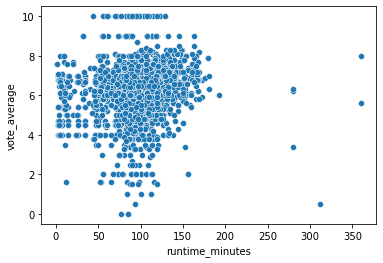

In [180]:
# runtime vs. vote_average scatter
sns.scatterplot(x=x, y=y2)

In [181]:
# runtime vs. domestic gross test
ind_ttest(x, y3)

Ttest_indResult(statistic=-37.59993348028125, pvalue=9.701741084385162e-260)

<AxesSubplot:xlabel='runtime_minutes'>

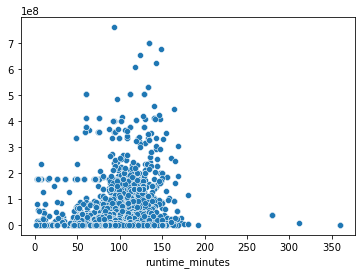

In [182]:
# runtime vs. domestic gross scatter
sns.scatterplot(x=x, y=y3)

In [ ]:
# budget vs. gross test
ind_ttest(x1, y)

In [ ]:
# budget vs. gross scatter
sns.scatterplot(x=x1, y=y)

In [ ]:
# budget vs. popularity test
ind_ttest(x1, y1)

In [ ]:
# budget vs. popularity scatter
sns.scatterplot(x=x1, y=y1)

In [ ]:
# budget vs. vote_average test
# ?? getting same result for this as budget vs. popularity
ind_ttest(x1, y2)

In [ ]:
# budget vs. vote_average scatter
sns.scatterplot(x=x1, y=y2)

In [ ]:
# budget vs. domestic gross
ind_ttest(x1, y3)

In [ ]:
# budget vs. domestic gross scatter
sns.scatterplot(x=x1, y=y3)

In [ ]:
movie_basics_budget.dropna(subset = ['runtime_minutes'], inplace=True)
movie_basics_budget.info()

In [ ]:

# re-defining the variables from before w/ add constant
x = sm.add_constant(movie_basics_budget['runtime_minutes'].values.astype(int))
x1 = sm.add_constant(movie_basics_budget['production_budget'].values.astype(int))

# same variables as before, just pasted again here
y = movie_basics_budget['worldwide_gross'].values.astype(int)
y1 = movie_basics_budget['popularity']
y2 = movie_basics_budget['vote_average']
y3 = movie_basics_budget['domestic_gross'].values.astype(int)

In [ ]:
# lin regression function

def lin_reg(y, x):
    lin_reg_model = sm.OLS(y, x).fit().summary()
    return lin_reg_model

In [ ]:
# budget vs. worldwide gross regression
lin_reg(y, x1)

In [ ]:
# budget vs. popularity
lin_reg(y1, x1)

In [ ]:
# budget vs. vote_average
lin_reg(y2, x1)

In [ ]:
# budget vs. domestic gross
lin_reg(y3, x1)

In [ ]:
# runtime vs. worldwide gross regression
lin_reg(y, x)

In [ ]:
# runtime vs. popularity regression
lin_reg(y1, x)

In [ ]:
# runtime vs. vote average regression
lin_reg(y2, x)

In [ ]:
# runtime vs. domestic gross regression
lin_reg(y3, x)

In [ ]:
movie_gross.info()

## Looking at movie_budgets

In [ ]:
zero_gross = movie_budgets.loc[movie_budgets['domestic_gross'] == 0]
zero_gross

In [ ]:
movie_budgets.head()

In [ ]:
movie_budgets.rename(columns={"movie":"primary_title"})

In [ ]:
movie_budgets.info()

In [ ]:
movie_budgets.describe(include='all')

## Looking at tmdb_movies

In [ ]:
tmdb_movies.head()

In [ ]:
tmdb_movies.info()

In [ ]:
tmdb_movies.describe(include='all')

## Looking at rt_reviews

In [ ]:
rt_reviews.head()

In [ ]:
rt_reviews.info()

In [ ]:
rt_reviews.describe(include='all')

## Looking at rt_movie_info

In [ ]:
rt_movie_info.head()

In [ ]:
rt_movie_info.info()

In [ ]:
rt_movie_info.describe(include='all')

## Looking at movie_gross

In [ ]:
movie_gross.head()

In [ ]:
movie_gross.info()

In [ ]:
movie_gross.describe(include='all')

In [ ]:
groupby = movie_gross.groupby('studio').mean()
groupby.sort_values('domestic_gross', ascending=False)

In [ ]:
lin_reg_model_3 = sm.OLS(y, x1).fit().summary()
